In [3]:
import numpy as np
import sympy as sp
import pandas as pd
import pylab as pl
pl.ion()

In [4]:
# setting symbolic variables
x, nu, t = sp.symbols('x nu t')
phi = sp.exp(-(x-4*t)**2 / (4*nu*(t+1))) + sp.exp(-(x-4*t - 2*np.pi)**2 / (4*nu*(t+1)))

# Evaluate partial derivative dphi/dx using sympy
phiprime = phi.diff(x)

# create the initial condition function
u = -2*nu*(phiprime/phi) + 4

# Transform the symbolic equation into a function using lambdify
from sympy.utilities.lambdify import lambdify
ufunc = lambdify((t,x,nu), u)

# Checking
ufunc(1,4,3)

3.49170664206445

In [5]:
# tensor form
nx = 201
nt = 401
dx = 2 * np.pi / (nx + 1)
nu = 0.07
dt = dx * nu


grid = np.linspace(0,2*np.pi, nx + 1)


def burger_solver(dt):
    U = np.zeros((int((nt + 1)/2), nx + 1))
    t = 0
    
    u = np.asarray([ufunc(t,x,nu) for x in grid])
    i = 0
    U[i, :] = u
    # un = np.empty(nx + 1)
    for i in range(1, nt + 1):
        un = u.copy()
        u =  un - un * dt/dx * (un - np.roll(un,1)) + nu * dt / dx**2 * (np.roll(un,-1) - 2 * un + np.roll(un,1))
        if i%2 == 0:
            U[int(i/2), :] = u
    
    return U


dt / 5e-3

0.43546828861640696

0.0021773414430820348


/tmp/ipykernel_43103/2909992705.py:22: RuntimeWarning: overflow encountered in multiply
  u =  un - un * dt/dx * (un - np.roll(un,1)) + nu * dt / dx**2 * (np.roll(un,-1) - 2 * un + np.roll(un,1))
/tmp/ipykernel_43103/2909992705.py:22: RuntimeWarning: invalid value encountered in subtract
  u =  un - un * dt/dx * (un - np.roll(un,1)) + nu * dt / dx**2 * (np.roll(un,-1) - 2 * un + np.roll(un,1))
/tmp/ipykernel_43103/2909992705.py:22: RuntimeWarning: invalid value encountered in add
  u =  un - un * dt/dx * (un - np.roll(un,1)) + nu * dt / dx**2 * (np.roll(un,-1) - 2 * un + np.roll(un,1))


Text(0.5, 1.0, '1D burger equation - Initial condition')

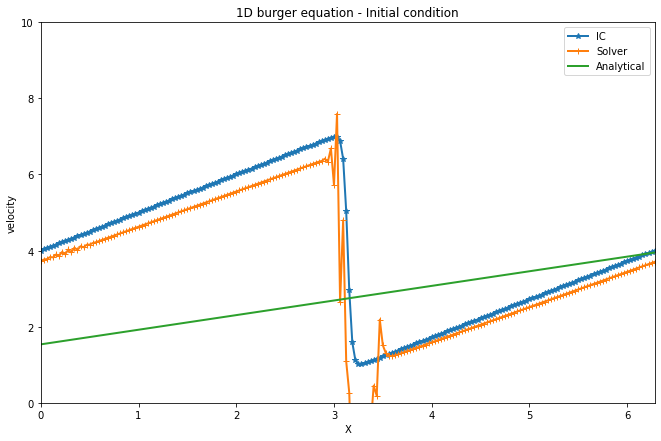

In [7]:
DT = 1 * dt
print(DT)

DT = 4.e-3
T = DT * nt
U = burger_solver(DT)
u_analytical = np.asarray([ufunc(T, xi, nu) for xi in grid])


pl.figure(figsize = (11,7))
pl.plot(grid, U[0,:], marker = '*', lw = 2, label = 'IC')
pl.plot(grid, U[10,:], marker = '+', lw = 2, label = 'Solver')
pl.plot(grid, u_analytical, lw = 2, label = 'Analytical')
pl.xlim([0, 2 * np.pi])
pl.ylim([0, 10])
pl.legend()
pl.xlabel('X')
pl.ylabel('velocity')
pl.title('1D burger equation - Initial condition')

(201, 202)
(50, 1)


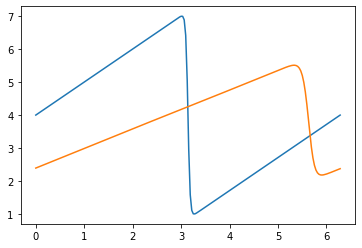

In [59]:
num_train = 200

Solution_samples_array = np.zeros((num_train, int((nt + 1)/2) * (nx + 1)))
D_array = np.zeros((num_train, 1))


for case in range(num_train):
#     print(case)
#     u0 = Drawing_IC().flatten()
    DT = np.random.choice(np.linspace(.5, 1.5, num_train)) * 2e-3
    U = burger_solver(DT)
        
    Solution_samples_array[case, :] = U.flatten()
    D_array[case, 0] = DT * 2


Solution_samples_array= pd.DataFrame({'samples' : Solution_samples_array.flatten()})
Solution_samples_array.to_csv('data/Training_data' + str(num_train) + '_Nx_' + str(nx) + '_Nt_' + str(int(nt/2)) + '.csv', index=False)
Solution_samples_array= pd.DataFrame({'samples' : D_array.flatten()})
Solution_samples_array.to_csv('data/D_array' + str(num_train) + '_Nx_' + str(nx) + '_Nt_' + str(int(nt/2)) + '.csv', index=False)


print(U.shape)
print(Solution_samples_array.shape)
pl.plot(grid, U[0,:])
pl.plot(grid, U[-1,:])

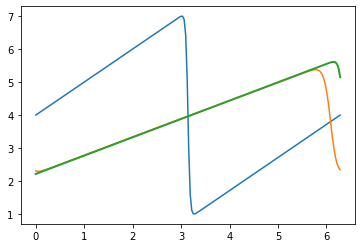

In [60]:
num_test = 1
Solution_samples_array = np.zeros((num_test, int((nt + 1)/2) * (nx + 1)))


for i in range(num_test):
    U = burger_solver(2e-3)
    Solution_samples_array[i, :] = U.flatten()

DT = 2e-3
T = DT * nt
u_analytical = np.asarray([ufunc(T, xi, nu) for xi in grid])

pl.plot(grid, U[0,:])
pl.plot(grid, U[-1,:])
pl.plot(grid, u_analytical, lw = 2, label = 'Analytical')

Solution_samples_array= pd.DataFrame({'samples' : Solution_samples_array.flatten()})
Solution_samples_array.to_csv('data/test_same_dt.csv', index=False)

In [57]:
U.shape

(201, 202)

In [58]:
dt

0.0021773414430820348